<a href="https://colab.research.google.com/github/HammadN98/pos/blob/main/introducao_python/An%C3%A1lise_de_dados_Nimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTÕES ABERTAS PARA PYTHON Análise de dados


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
url = "https://raw.githubusercontent.com/HammadN98/pos/refs/heads/main/introducao_python/dados/Exercicio%20Aberto.csv"
dados = pd.read_csv(url)
dados.head()

,Nome do Produto,Nome do Produtor,Moeda,Valor do Produto,Data de Venda,id_comprador,Idade,Localização,Tipo de Pagamento
0,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,142,23.0,São Paulo,Cartão de Crédito
1,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,158,29.0,Minas Gerais,Pix
2,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,175,NaN,MINAS GERAIS,Boleto
3,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,37,26.0,MINAS GERAIS,Boleto
4,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,49,26.0,MINAS GERAIS,Cartão de Crédito


In [18]:
print(dados.shape)

(351, 9)


In [19]:
dados.dropna(inplace=True)
dados.shape

(327, 9)

## 1. Utilizando Python, responda às seguintes perguntas:
- a. Qual a média das idades dos compradores?

- b. Quem é o comprador mais velho e o mais novo?
   
- c. Qual produto teve mais vendas?

In [20]:
print(f"A media das idades corresponde a: {dados['Idade'].mean():.0f} anos") #Sem decimais ja que idade nao tem quebrado

A media das idades corresponde a: 26 anos


In [21]:
print(f"A pessoa mais velha a realizar uma compra tinha a idade de: {dados['Idade'].max()} anos")



A pessoa mais velha a realizar uma compra tinha a idade de: 60.0 anos


In [22]:
dados['Idade'].min() #Ao utilizar os dados sem algum tratamento, ira devolver que a pessoa mais nova a realizaruma compra foi com 0 anos. O que sabemos que nao eh possivel

0.0

In [23]:
dados_sem_zero = dados.loc[dados['Idade'] > 0]
print(f"A pessoa mais nova a realizar uma compra tinha a idade de: {dados_sem_zero['Idade'].min()}")

A pessoa mais nova a realizar uma compra tinha a idade de: 19.0


In [24]:
mais_vendas = dados['Nome do Produto'].value_counts().iloc[0]
mais_nome = dados['Nome do Produto'].value_counts().idxmax()
print(f"O produto mais vendido eh: {mais_nome}, com uma quantidade de {mais_vendas} itens vendidos")

O produto mais vendido eh: Mentoria Apollo 11, com uma quantidade de 230 itens vendidos


## 2.
Utilizando Python, mostre em um gráfico qual foi o método de pagamento
mais utilizado pelos compradores.

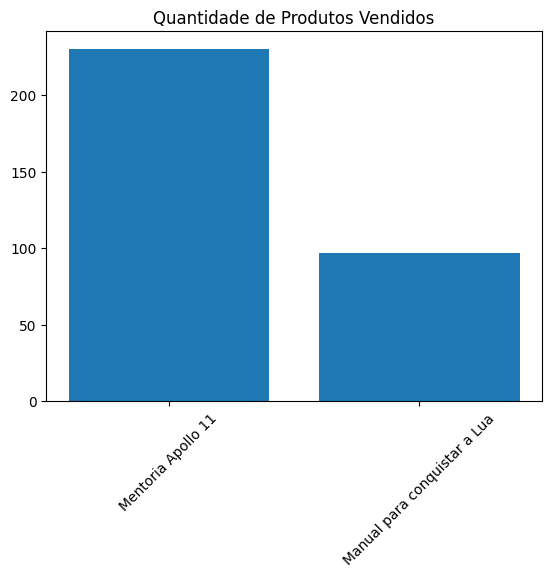

In [25]:
contagem_produtos = dados['Nome do Produto'].value_counts()

plt.bar(contagem_produtos.index, contagem_produtos.values)
plt.title('Quantidade de Produtos Vendidos')
plt.xticks(rotation=45)
plt.show()


##3. Utilizando Python, mostre em um gráfico a quantidade de vendas por mês.


In [39]:
dados['Data de Venda'].value_counts()

,count
Data de Venda,
2021-06-02,33
2021-05-29,28
2021-06-05,25
2021-05-28,24
2021-05-27,22
2021-05-30,22
2021-06-03,22
2021-06-01,21
2021-06-04,21


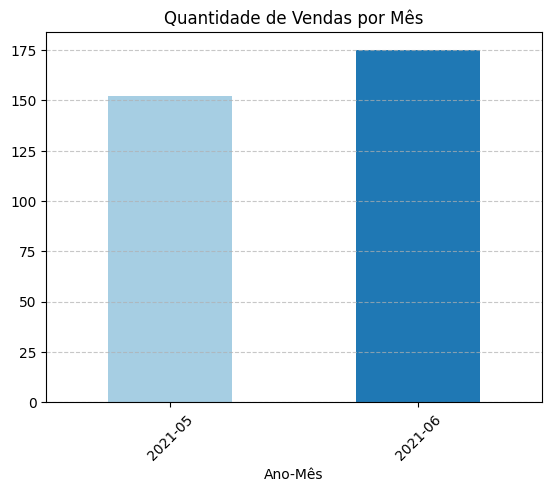

In [40]:
dados['Data de Venda'] = pd.to_datetime(dados['Data de Venda'], format='%d/%m/%Y')

dados['Ano-Mês'] = dados['Data de Venda'].dt.to_period('M')

vendas_por_mes = dados['Ano-Mês'].value_counts().sort_index()


cores = plt.cm.Paired(range(len(vendas_por_mes)))
vendas_por_mes.plot(kind='bar', color=cores)
plt.title('Quantidade de Vendas por Mês')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 4. Utilizando Python, mostre em um gráfico as vendas por estado.


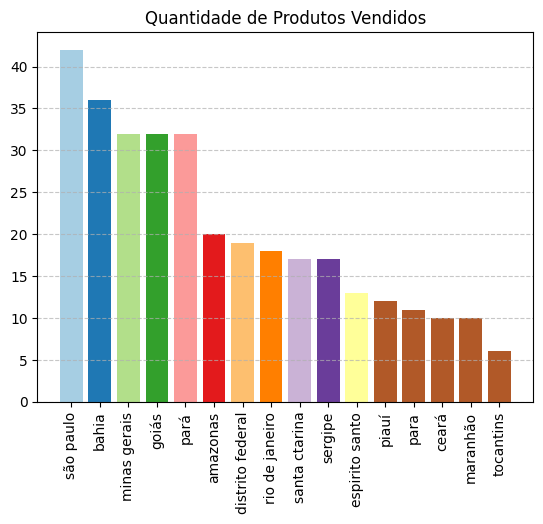

In [34]:
dados['Localização'] = dados['Localização'].str.lower()
contagem_loc = dados['Localização'].value_counts()

cores = plt.cm.Paired(range(len(contagem_loc)))

plt.bar(contagem_loc.index, contagem_loc.values, color=cores)
plt.title('Quantidade de Produtos Vendidos')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
